# Task 6:  Music Genre Classification Description
## *Description:*
1. Dataset (Recommended): [GTZAN (Kaggle)](https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification)
2. Classify songs into genres based on extracted audio features.
3. Preprocess features such as MFCCs or use spectrogram images.
4. Train and evaluate a multi-class model using tabular or image data.
5. If image-based, use a CNN model.

In [ ]:
from src.load_data import load_data
from src.train import train
from src.model import SimpleCNN
from src.pretrained import load_pretrained_model
from src.evaluate import eval
from src.utils import plot_accuracy_loss,plot_classification_report,plot_confusion_matrix,evaluate_model
from sklearn.metrics import roc_auc_score
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [12]:
train_loader, test_loader, classes = load_data('Data/images_original')
num_classes = len(classes)
model = SimpleCNN(num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 20

Size of the training dataloader: 50
Size of the test dataloader: 13


## Custom CNN Training and Performance

In [ ]:
history = train(model,train_loader,test_loader,device,num_epochs,optimizer,criterion)
eval(model,test_loader,device)

--------------------Training Started---------------------
Epoch [1/20], Train Loss: 2.2524, Train Accuracy: 15.64%
Epoch [1/20], Test Loss: 2.13782, Test Accuracy: 21.15% 
Epoch [2/20], Train Loss: 2.0297, Train Accuracy: 24.16%
Epoch [2/20], Test Loss: 1.96508, Test Accuracy: 30.77% 
Epoch [3/20], Train Loss: 1.8027, Train Accuracy: 34.42%
Epoch [3/20], Test Loss: 1.75430, Test Accuracy: 42.31% 
Epoch [4/20], Train Loss: 1.6261, Train Accuracy: 41.80%
Epoch [4/20], Test Loss: 1.71996, Test Accuracy: 42.31% 
Epoch [5/20], Train Loss: 1.5243, Train Accuracy: 44.68%
Epoch [5/20], Test Loss: 1.56295, Test Accuracy: 46.15% 
Epoch [6/20], Train Loss: 1.3621, Train Accuracy: 49.94%
Epoch [6/20], Test Loss: 1.49133, Test Accuracy: 48.08% 
Epoch [7/20], Train Loss: 1.2197, Train Accuracy: 57.57%
Epoch [7/20], Test Loss: 1.51387, Test Accuracy: 49.04% 
Epoch [8/20], Train Loss: 1.0459, Train Accuracy: 62.08%
Epoch [8/20], Test Loss: 1.44412, Test Accuracy: 52.88% 
Epoch [9/20], Train Loss: 0.97

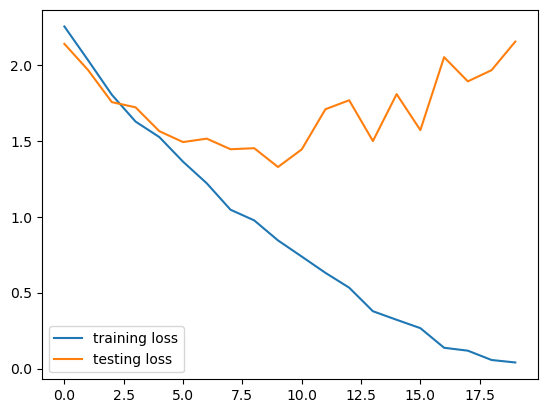

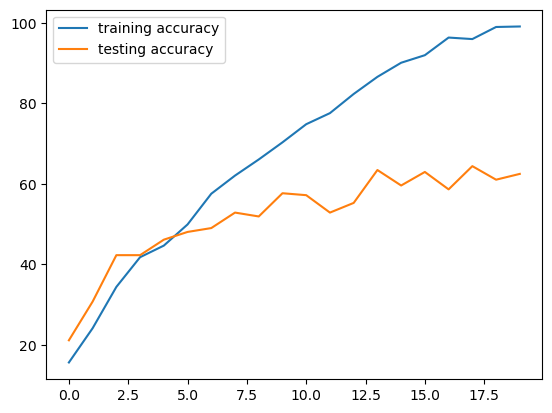

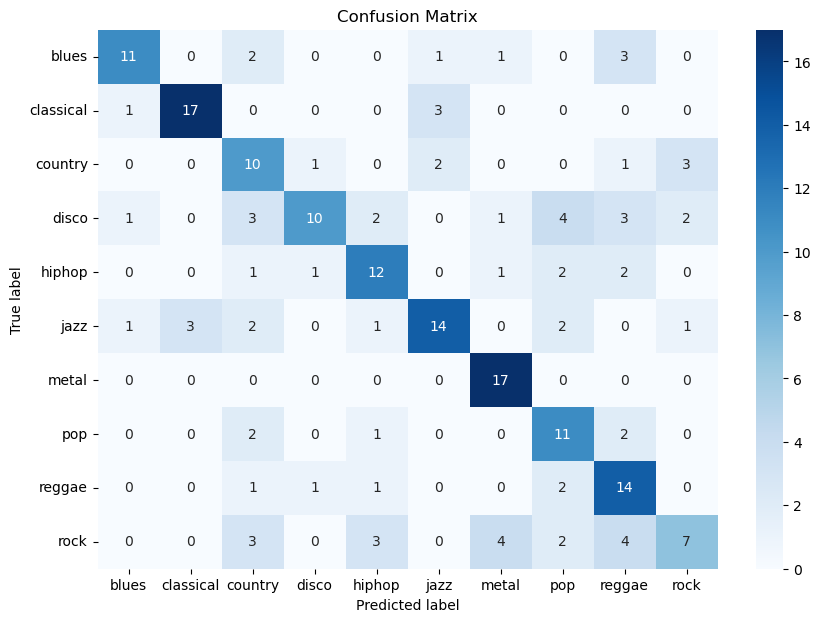

              precision    recall  f1-score   support

           0       0.79      0.61      0.69        18
           1       0.85      0.81      0.83        21
           2       0.42      0.59      0.49        17
           3       0.77      0.38      0.51        26
           4       0.60      0.63      0.62        19
           5       0.70      0.58      0.64        24
           6       0.71      1.00      0.83        17
           7       0.48      0.69      0.56        16
           8       0.48      0.74      0.58        19
           9       0.54      0.30      0.39        23

    accuracy                           0.61       200
   macro avg       0.63      0.63      0.61       200
weighted avg       0.64      0.61      0.61       200

Roc score: 0.9095


In [14]:
# Evaluate model
y_true, y_pred = evaluate_model(model, test_loader,device)
    
# Plot results
plot_accuracy_loss(history,mode='loss')
plot_accuracy_loss(history,mode='accuracy')
plot_confusion_matrix(y_true, y_pred, classes)
plot_classification_report(y_true, y_pred)
roc = roc_auc_score(y_true,y_pred,multi_class='ovr')
print(f'Roc score: {roc:.4f}')


## MobileNet Training and Performance

Training mobilenet...
--------------------Training Started---------------------
Epoch [1/20], Train Loss: 1.6135, Train Accuracy: 44.43%
Epoch [1/20], Test Loss: 1.39227, Test Accuracy: 50.96% 
Epoch [2/20], Train Loss: 1.0049, Train Accuracy: 65.21%
Epoch [2/20], Test Loss: 1.47735, Test Accuracy: 55.77% 
Epoch [3/20], Train Loss: 0.7957, Train Accuracy: 71.96%
Epoch [3/20], Test Loss: 1.35958, Test Accuracy: 62.02% 
Epoch [4/20], Train Loss: 0.5871, Train Accuracy: 80.10%
Epoch [4/20], Test Loss: 1.30348, Test Accuracy: 60.58% 
Epoch [5/20], Train Loss: 0.4699, Train Accuracy: 84.61%
Epoch [5/20], Test Loss: 1.32762, Test Accuracy: 61.54% 
Epoch [6/20], Train Loss: 0.4314, Train Accuracy: 84.61%
Epoch [6/20], Test Loss: 1.34334, Test Accuracy: 62.02% 
Epoch [7/20], Train Loss: 0.2876, Train Accuracy: 91.74%
Epoch [7/20], Test Loss: 1.36929, Test Accuracy: 66.35% 
Epoch [8/20], Train Loss: 0.3661, Train Accuracy: 88.74%
Epoch [8/20], Test Loss: 1.80346, Test Accuracy: 62.50% 
Epoch [9

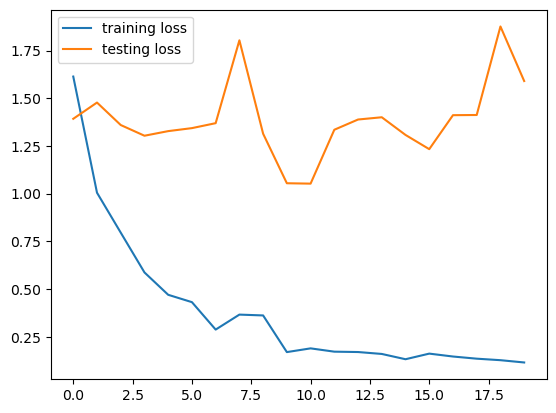

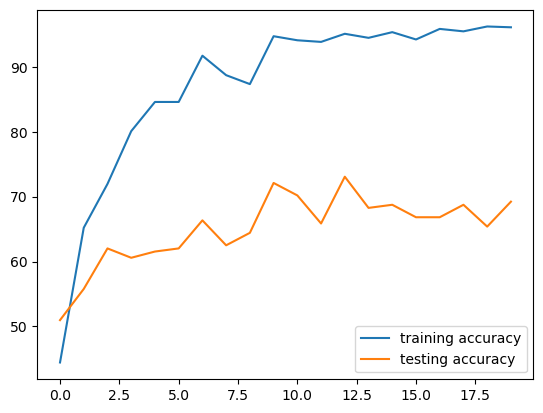

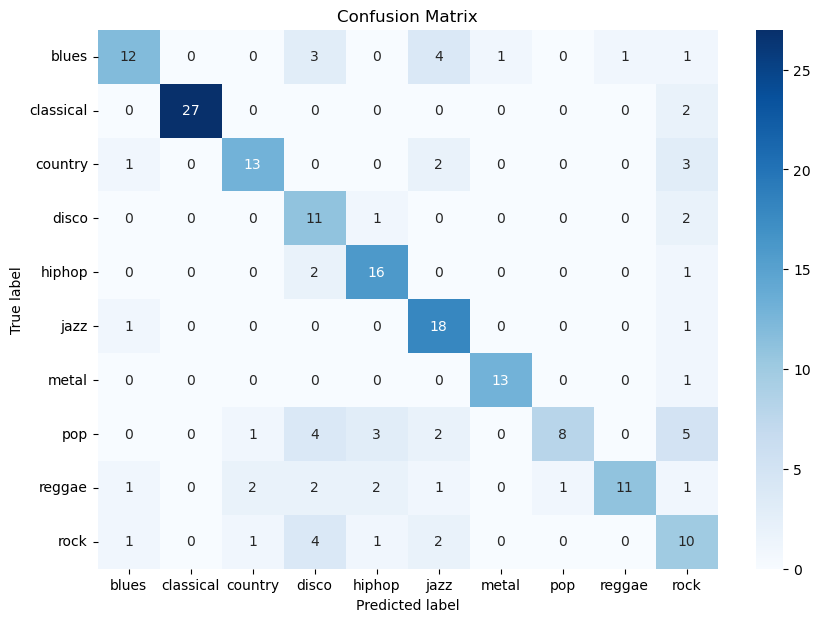

              precision    recall  f1-score   support

           0       0.75      0.55      0.63        22
           1       1.00      0.93      0.96        29
           2       0.76      0.68      0.72        19
           3       0.42      0.79      0.55        14
           4       0.70      0.84      0.76        19
           5       0.62      0.90      0.73        20
           6       0.93      0.93      0.93        14
           7       0.89      0.35      0.50        23
           8       0.92      0.52      0.67        21
           9       0.37      0.53      0.43        19

    accuracy                           0.69       200
   macro avg       0.74      0.70      0.69       200
weighted avg       0.76      0.69      0.70       200

Roc score: 0.9367


In [10]:
model_name = 'mobilenet'
print(f'Training {model_name}...')
    
model = load_pretrained_model(model_name, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
    
history = train(model,train_loader,test_loader,device,num_epochs,optimizer,criterion, learning_rate = 1e-3)
# Test Accuracy
eval(model,test_loader,device)
# Evaluate model
y_true, y_pred = evaluate_model(model, test_loader,device)
    
# Plot results
plot_accuracy_loss(history,mode='loss')
plot_accuracy_loss(history,mode='accuracy')

plot_confusion_matrix(y_true, y_pred, classes)
plot_classification_report(y_true, y_pred)
roc = roc_auc_score(y_true,y_pred,multi_class='ovr')
print(f'Roc score: {roc:.4f}')


## Performance Comparison

In [15]:
performance = pd.DataFrame({
    'Models' : ['Custom CNN','mobilenet'],
    'accuracy': ['61.50%', '69.50%'],
    'ROC Score': [0.9095,0.9367]
})
performance

,Models,accuracy,ROC Score
0,Custom CNN,61.50%,0.9095
1,mobilenet,69.50%,0.9367
